# **CSE 546: Final Project**

## Libraries Importation and Data Reading
- Import the necessary libraries.
- Load and inspect the movie reviews dataset.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder # found online ~ due to y values not being integers but strings
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, accuracy_score, f1_score, roc_auc_score

In [2]:
df1 = pd.read_csv("Data.csv")
df2 = pd.read_csv("extra_hard_samples.csv")
ds = pd.concat([df1, df2], axis=0).reset_index(drop=True)

y = ds["class"]
images = ds["image_name"]
ds = ds.drop("class", axis=1)
ds = ds.drop("image_name", axis=1)

## KNN Classifier

### Base Algorithm

k running now: 1
Fold running now: 1
Fold running now: 2
Fold running now: 3
Fold running now: 4
k running now: 2
Fold running now: 1
Fold running now: 2
Fold running now: 3
Fold running now: 4
k running now: 3
Fold running now: 1
Fold running now: 2
Fold running now: 3
Fold running now: 4
k running now: 4
Fold running now: 1
Fold running now: 2
Fold running now: 3
Fold running now: 4
k running now: 5
Fold running now: 1
Fold running now: 2
Fold running now: 3
Fold running now: 4
k running now: 6
Fold running now: 1
Fold running now: 2
Fold running now: 3
Fold running now: 4
k running now: 7
Fold running now: 1
Fold running now: 2
Fold running now: 3
Fold running now: 4
k running now: 8
Fold running now: 1
Fold running now: 2
Fold running now: 3
Fold running now: 4
k running now: 9
Fold running now: 1
Fold running now: 2
Fold running now: 3
Fold running now: 4
k running now: 10
Fold running now: 1
Fold running now: 2
Fold running now: 3
Fold running now: 4
k running now: 11
Fold runnin

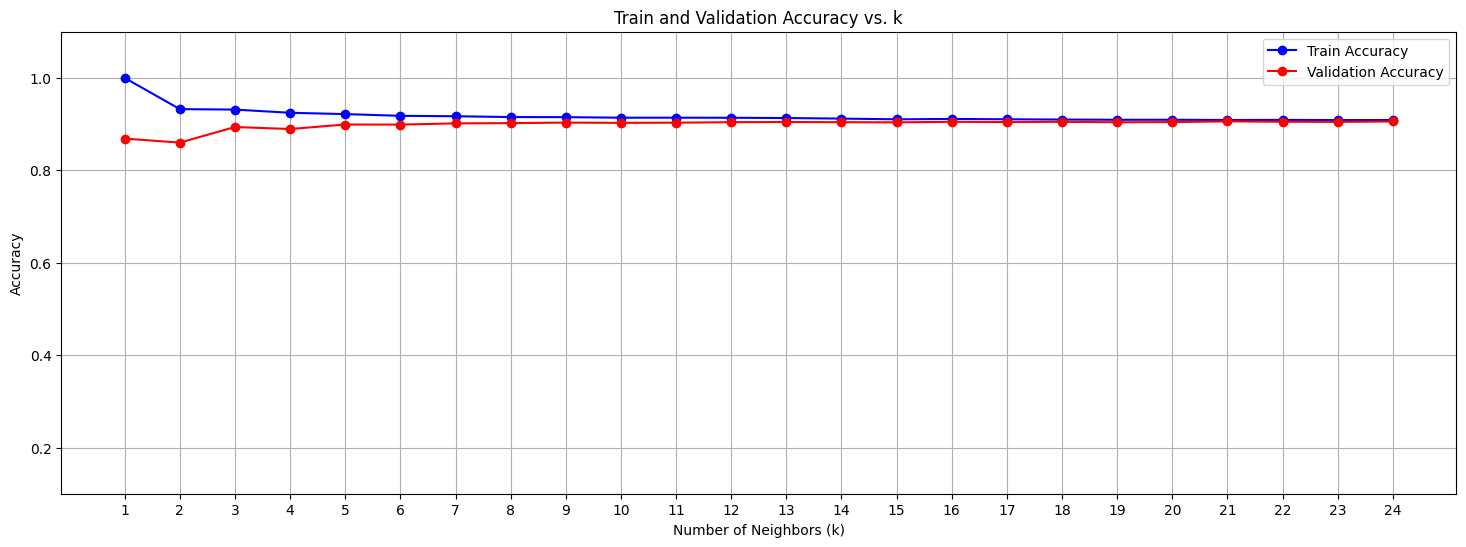

Best Validation Accuracy: 0.9059 for K = 2.1000e+01


In [3]:
# Classifier #1: KNN --------------------------------------------------------------------------
# KNN 4-fold cross validation on K parameter: 5 wins - 0.9868 with K = 5.0000e+00
X=ds.to_numpy()
y=y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k_range = range(1, 25)  # varying k values
cv_scores = []
average_scores = []
train_scores = []
val_scores = []
kf = KFold(n_splits=4, shuffle=True, random_state=42)

for k in k_range:
    fold_train_scores = []
    fold_val_scores = []
    print("k running now:", k)
    count = 0
    for train_index, test_index in kf.split(X_train, y_train):
        count += 1
        print("Fold running now:", count)
        X_train_fold, X_val_fold = X_train[train_index], X_train[test_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]

        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_fold, y_train_fold)

        fold_train_scores.append(knn.score(X_train_fold, y_train_fold))
        fold_val_scores.append(knn.score(X_val_fold, y_val_fold))

    train_scores.append(np.mean(fold_train_scores))
    val_scores.append(np.mean(fold_val_scores))

plt.figure(figsize=(18, 6))
plt.plot(k_range, train_scores, marker='o', linestyle='-', color='blue', label='Train Accuracy')
plt.plot(k_range, val_scores, marker='o', linestyle='-', color='red', label='Validation Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy vs. k')
plt.xticks(k_range)
plt.ylim(0.1, 1.1)  # set y-axis limits
plt.legend()
plt.grid(True)
plt.show()
best_index = np.argmax(val_scores)
best_alpha = k_range[best_index]
best_val_acc = val_scores[best_index]

print(f"Best Validation Accuracy: {best_val_acc:.4f} for K = {best_alpha:.4e}")



### Testing Different Metrics


In [4]:
# testing different metrics------------Manhattan wins(k value = 5, train was 0.9890 and validation was 0.9875)
le = LabelEncoder()
y = le.fit_transform(y)
X = pd.get_dummies(ds).to_numpy()

kf = KFold(n_splits=4, shuffle=True, random_state=42)
best_k = 5
distance_metrics = ['euclidean', 'manhattan', 'minkowski']
train_accuracies = {metric: [] for metric in distance_metrics}
val_accuracies = {metric: [] for metric in distance_metrics}

for metric in distance_metrics:
    train_scores = []
    val_scores = []
    print(metric)
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        knn = KNeighborsClassifier(n_neighbors=best_k, metric=metric)
        knn.fit(X_train_fold, y_train_fold)

        train_scores.append(knn.score(X_train_fold, y_train_fold))
        val_scores.append(knn.score(X_val_fold, y_val_fold))

    train_accuracies[metric] = np.mean(train_scores)
    val_accuracies[metric] = np.mean(val_scores)

plt.figure(figsize=(10, 6))

for metric in distance_metrics:
    plt.plot([best_k], [train_accuracies[metric]], marker='o', label=f'{metric.capitalize()} (Training Accuracy)', linestyle='--')

for metric in distance_metrics:
    plt.plot([best_k], [val_accuracies[metric]], marker='s', label=f'{metric.capitalize()} (Validation Accuracy)')

plt.title(f"KNN Accuracy Comparison with Different Distance Metrics (k={best_k})")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
for metric in distance_metrics:
    print(f"Best k = {best_k}, Distance Metric = {metric.capitalize()}:")
    print(f"Training Accuracy: {train_accuracies[metric]:.4f}")
    print(f"Validation Accuracy: {val_accuracies[metric]:.4f}")
    print('---')



euclidean
manhattan


ValueError: invalid literal for int() with base 10: 'bike'

### Data Normalization - MinMax & Mean-Sigma & Median-MAD & RobustScaler

In [ ]:
#KNN Data normalization #1: MinMax
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

fig,ax=plt.subplots(figsize=(10,10))
k_list=np.arange(2,34,1)
knn_dict={}
for i in k_list:
    print(i)
    knn=KNeighborsClassifier(n_neighbors=int(i), metric='minkowski')
    model_knn=knn.fit(X_train,y_train.ravel())
    y_knn_pred=model_knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_knn_pred)
    knn_dict[i] = accuracy
best_k = max(knn_dict, key=knn_dict.get)
best_accuracy = knn_dict[best_k]
print(f"MinMax: Highest Accuracy: {best_accuracy:.4f} at k={best_k}")
ax.plot(knn_dict.keys(),knn_dict.values(), marker='o', linestyle='-')
ax.set_xlabel('K-VALUE', fontsize=20)
ax.set_ylabel('Accuracy',fontsize=20)
ax.set_title('K-Value vs Accuracy', fontsize=22)
plt.show()

#KNN Data normalization #2: Mean-Sigma
scaler = StandardScaler()
X = scaler.fit_transform(X)
if (X < 0).any():
    X -= X.min(axis=0)  #make all features non-negative

fig,ax=plt.subplots(figsize=(10,10))
k_list=np.arange(2,34,1)
knn_dict={}
for i in k_list:
    print(i)
    knn=KNeighborsClassifier(n_neighbors=int(i), metric='minkowski')
    model_knn=knn.fit(X_train,y_train.ravel())
    y_knn_pred=model_knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_knn_pred)
    knn_dict[i] = accuracy
best_k = max(knn_dict, key=knn_dict.get)
best_accuracy = knn_dict[best_k]
print(f"Mean-Sigma: Highest Accuracy: {best_accuracy:.4f} at k={best_k}")
ax.plot(knn_dict.keys(),knn_dict.values(), marker='o', linestyle='-')
ax.set_xlabel('K-VALUE', fontsize=20)
ax.set_ylabel('Accuracy',fontsize=20)
ax.set_title('K-Value vs Accuracy', fontsize=22)
plt.show()

#KNN Data normalization #3: Median-MAD
def median_mad_normalize(X): #SOURCE: google generative ai when searched in google "median mad normalization in python"
    medians = np.median(X, axis=0)
    mad = np.median(np.abs(X - medians), axis=0)
    mad[mad == 0] = 1e-6
    X_normalized = (X - medians) / mad
    return X_normalized
X = median_mad_normalize(X)

fig,ax=plt.subplots(figsize=(10,10))
k_list=np.arange(2,34,1)
knn_dict={}
for i in k_list:
    print(i)
    knn=KNeighborsClassifier(n_neighbors=int(i), metric='minkowski')
    model_knn=knn.fit(X_train,y_train.ravel())
    y_knn_pred=model_knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_knn_pred)
    knn_dict[i] = accuracy
best_k = max(knn_dict, key=knn_dict.get)
best_accuracy = knn_dict[best_k]
print(f"Median-MAD: Highest Accuracy: {best_accuracy:.4f} at k={best_k}")
ax.plot(knn_dict.keys(),knn_dict.values(), marker='o', linestyle='-')
ax.set_xlabel('K-VALUE', fontsize=20)
ax.set_ylabel('Accuracy',fontsize=20)
ax.set_title('K-Value vs Accuracy', fontsize=22)
plt.show()

#KNN Data normalization #4: robustScaler
robust_scaler = RobustScaler()
X_selected = robust_scaler.fit_transform(X)

fig,ax=plt.subplots(figsize=(10,10))
k_list=np.arange(2,34,1)
knn_dict={}
for i in k_list:
    print(i)
    knn=KNeighborsClassifier(n_neighbors=int(i), metric='minkowski')
    model_knn=knn.fit(X_train,y_train.ravel())
    y_knn_pred=model_knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_knn_pred)
    knn_dict[i] = accuracy
best_k = max(knn_dict, key=knn_dict.get)
best_accuracy = knn_dict[best_k]
print(f"RobustScaler: Highest Accuracy: {best_accuracy:.4f} at k={best_k}")
ax.plot(knn_dict.keys(),knn_dict.values(), marker='o', linestyle='-')
ax.set_xlabel('K-VALUE', fontsize=20)
ax.set_ylabel('Accuracy',fontsize=20)
ax.set_title('K-Value vs Accuracy', fontsize=22)
plt.show()



### Feature Selection

In [ ]:
# KNN Feature selection #1
k = 5  # Number of top features to select ~ modify this value to get different results
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
fig,ax=plt.subplots(figsize=(10,10))
k_list=np.arange(2,34,1)
knn_dict={}
for i in k_list:
    print(i)
    knn=KNeighborsClassifier(n_neighbors=int(i), metric='minkowski')
    model_knn=knn.fit(X_train,y_train.ravel())
    y_knn_pred=model_knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_knn_pred)
    knn_dict[i] = accuracy
best_k = max(knn_dict, key=knn_dict.get)
best_accuracy = knn_dict[best_k]
print(f"Feature Select #1: Highest Accuracy: {best_accuracy:.4f} at k={best_k}")
ax.plot(knn_dict.keys(),knn_dict.values(), marker='o', linestyle='-')
ax.set_xlabel('K-VALUE', fontsize=20)
ax.set_ylabel('Accuracy',fontsize=20)
ax.set_title('K-Value vs Accuracy', fontsize=22)
plt.show()

# KNN Feature selection #2 - another method found online that uses RFC ------------
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
selector = SelectFromModel(rf, threshold="median") #selects above the median
selector.fit(X, y)
X_selected = selector.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Feature Selection #2: Accuracy with RF-selected features: {accuracy:.4f}")
selected_features = selector.get_support(indices=True)
print(f"Feature Selection #2: Selected feature indices: {selected_features}")

## MNB Classifier

### Base Algorithm

In [ ]:
# Classifier 2: MNB: 4 fold on MNB: alpha that won = 10^-4, 0.9828
scaler = MinMaxScaler()
X = scaler.fit_transform(X) #tells features to be [0,1] to avoid negative bc mnb doesn't work with negative values in data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
alpha_range = np.logspace(-4, 4, 9)  # This creates a range from 1e-4 to 1e4
train_scores = []
val_scores = []
kf = KFold(n_splits=4, shuffle=True, random_state=50)

for A in alpha_range:
    fold_train_scores = []
    fold_val_scores = []
    print("A running now:", A)
    count = 0
    for train_index, val_index in kf.split(X_train, y_train):
        count += 1
        print("Fold running now:", count)
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        mnb = MultinomialNB(alpha=A)
        mnb.fit(X_train_fold, y_train_fold)

        fold_train_scores.append(mnb.score(X_train_fold, y_train_fold))
        fold_val_scores.append(mnb.score(X_val_fold, y_val_fold))

    train_scores.append(np.mean(fold_train_scores))
    val_scores.append(np.mean(fold_val_scores))

plt.figure(figsize=(18, 6))
plt.plot(alpha_range, train_scores, marker='o', linestyle='-', color='blue', label='Train Accuracy')
plt.plot(alpha_range, val_scores, marker='o', linestyle='-', color='red', label='Validation Accuracy')
plt.xscale('log')  # Use a logarithmic scale for C
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy vs. C')
plt.ylim(0.1, 1.1)  # set y-axis limits
plt.legend()
plt.grid(True)
plt.show()
best_index = np.argmax(val_scores)
best_alpha = alpha_range[best_index]
best_val_acc = val_scores[best_index]

print(f"Best Validation Accuracy: {best_val_acc:.4f} for Alpha = {best_alpha:.4e}")

### Data Normalization

In [ ]:
# MNB Data normalization #1: MinMax
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
neighbors = np.arange(1, 20) 
flag = .00001
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 
alpha_values = []
for i in range(0, 19): 
    flag *= 10
    mnb = MultinomialNB(alpha=flag, fit_prior=True)
    mnb.fit(X_train, y_train)
    train_accuracy[i] = mnb.score(X_train, y_train) 
    test_accuracy[i] = mnb.score(X_test, y_test) 
    alpha_values.append(flag)
best_index = np.argmax(test_accuracy)
best_alpha = alpha_values[best_index]
best_test_acc = test_accuracy[best_index]
print(f"MinMax: Highest Test Accuracy: {best_test_acc:.4f} at Alpha = {best_alpha:.4e}")
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
plt.legend() 
plt.xlabel('run time starting with .0001 then times 10 each run') 
plt.ylabel('Accuracy') 
plt.show()

# MNB Data normalization #2: Mean-Sigma
scaler = StandardScaler()
X = scaler.fit_transform(X)
if (X < 0).any():
    X -= X.min(axis=0)  #make all features non-negative
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
neighbors = np.arange(1, 20) 
flag = .00001
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 
alpha_values = []
for i in range(0, 19): 
    flag *= 10
    mnb = MultinomialNB(alpha=flag, fit_prior=True)
    mnb.fit(X_train, y_train)
    train_accuracy[i] = mnb.score(X_train, y_train) 
    test_accuracy[i] = mnb.score(X_test, y_test) 
    alpha_values.append(flag)
best_index = np.argmax(test_accuracy)
best_alpha = alpha_values[best_index]
best_test_acc = test_accuracy[best_index]
print(f"Mean-Sigma: Highest Test Accuracy: {best_test_acc:.4f} at Alpha = {best_alpha:.4e}")
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
plt.legend() 
plt.xlabel('run time starting with .0001 then times 10 each run') 
plt.ylabel('Accuracy') 
plt.show()

# MNB Data normalization #3: Median-MAD
def median_mad_normalize_nonnegative(data):
    medians = np.median(data, axis=0)
    mad = np.median(np.abs(data - medians), axis=0)
    mad[mad == 0] = 1  # Prevent division by zero
    normalized_data = (data - medians) / mad

    # Shift to make all values non-negative
    min_val = np.min(normalized_data)
    if min_val < 0:
        normalized_data += abs(min_val) + 1e-6  # Shift to ensure non-negativity
    return normalized_data
X = median_mad_normalize_nonnegative(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
neighbors = np.arange(1, 20) 
flag = .00001
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 
alpha_values = []
for i in range(0, 19): 
    flag *= 10
    mnb = MultinomialNB(alpha=flag, fit_prior=True)
    mnb.fit(X_train, y_train)
    train_accuracy[i] = mnb.score(X_train, y_train) 
    test_accuracy[i] = mnb.score(X_test, y_test) 
    alpha_values.append(flag)
best_index = np.argmax(test_accuracy)
best_alpha = alpha_values[best_index]
best_test_acc = test_accuracy[best_index]
print(f"Median-MAD: Highest Test Accuracy: {best_test_acc:.4f} at Alpha = {best_alpha:.4e}")
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
plt.legend() 
plt.xlabel('run time starting with .0001 then times 10 each run') 
plt.ylabel('Accuracy') 
plt.show()

# MNB Data normalization #4: robustScaler
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)
X = X - X.min(axis=0) #shift so no negatives

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
neighbors = np.arange(1, 20) 
flag = .00001
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 
alpha_values = []
for i in range(0, 19): 
    flag *= 10
    mnb = MultinomialNB(alpha=flag, fit_prior=True)
    mnb.fit(X_train, y_train)
    train_accuracy[i] = mnb.score(X_train, y_train) 
    test_accuracy[i] = mnb.score(X_test, y_test) 
    alpha_values.append(flag)
best_index = np.argmax(test_accuracy)
best_alpha = alpha_values[best_index]
best_test_acc = test_accuracy[best_index]
print(f"Median-MAD: Highest Test Accuracy: {best_test_acc:.4f} at Alpha = {best_alpha:.4e}")
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
plt.legend() 
plt.xlabel('run time starting with .0001 then times 10 each run') 
plt.ylabel('Accuracy') 
plt.show()

### Feature Selection

In [ ]:
# MNB Feature selection #1
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
k = 50  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
X = selector.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
neighbors = np.arange(1, 20)
flag = .00001
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
alpha_values = []
for i in range(0, 19):
    flag *= 10
    mnb = MultinomialNB(alpha=flag, fit_prior=True)
    mnb.fit(X_train, y_train)
    train_accuracy[i] = mnb.score(X_train, y_train)
    test_accuracy[i] = mnb.score(X_test, y_test)
    alpha_values.append(flag)
best_index = np.argmax(test_accuracy)
best_alpha = alpha_values[best_index]
best_test_acc = test_accuracy[best_index]
print(f"MNB Feature selection 1: Highest Test Accuracy: {best_test_acc:.4f} at Alpha = {best_alpha:.4e}")
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
plt.legend()
plt.xlabel('run time starting with .0001 then times 10 each run')
plt.ylabel('Accuracy')
plt.show()

# MNB Feature selection #2 - another method found online that uses RFC
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
selector = SelectFromModel(rf, threshold="median") #selects above the median
selector.fit(X, y)
X_selected = selector.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
mnb = MultinomialNB(alpha=100, fit_prior=True) #select optimal value
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with RF-selected features: {accuracy:.4f}")
selected_features = selector.get_support(indices=True)
print(f"Selected feature indices: {selected_features}")

## RF Classifier

### Base Algorithm

In [ ]:
#Classifier #3: RF --------------------------------------------------------------------------
#4fold on max_depth on RF with n_estimators=1000 => winner: max_depth=None
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
max_depth_values = [None,5, 10, 20, 30, 50, 100]
train_scores = []
val_scores = []
kf = KFold(n_splits=4, shuffle=True, random_state=50)

for N in max_depth_values:
    fold_train_scores = []
    fold_val_scores = []
    print("depth running now:", N)
    count = 0
    for train_index, val_index in kf.split(X_train, y_train):
        count += 1
        print("Fold running now:", count)
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        forest = RandomForestClassifier(n_estimators=1000,max_depth=N, random_state=42)
        forest.fit(X_train_fold, y_train_fold)

        fold_train_scores.append(forest.score(X_train_fold, y_train_fold))
        fold_val_scores.append(forest.score(X_val_fold, y_val_fold))

    train_scores.append(np.mean(fold_train_scores))
    val_scores.append(np.mean(fold_val_scores))

plt.figure(figsize=(18, 6))
plt.plot(max_depth_values, train_scores, marker='o', linestyle='-', color='blue', label='Train Accuracy')
plt.plot(max_depth_values, val_scores, marker='o', linestyle='-', color='red', label='Validation Accuracy')
plt.xscale('log')  # Use a logarithmic scale for C
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy vs. C')
plt.ylim(0.1, 1.1)  # set y-axis limits
plt.legend()
plt.grid(True)
plt.show()
best_index = np.argmax(val_scores)
best_n = max_depth_values[best_index]
best_val_acc = val_scores[best_index]
print(f"Best Validation Accuracy: {best_val_acc:.4f} for depth = {best_n}")

### Data Normalization

In [ ]:
# RF: no preprocessing ----------------------
# RF Data normalization #1: MinMax
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
max_depth_values = [None,5, 10, 20, 30, 50, 100]
neighbors = np.arange(1, 8) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 
depth_values = []
for i in range(0, 7):
    print(max_depth_values[i])
    forest = RandomForestClassifier(n_estimators=1000,max_depth=max_depth_values[i], random_state=42)
    forest.fit(X_train, y_train)
    train_accuracy[i] = forest.score(X_train, y_train) 
    test_accuracy[i] = forest.score(X_test, y_test) 
    depth_values.append(max_depth_values[i])
best_index = np.argmax(test_accuracy)
best_alpha = depth_values[best_index]
best_test_acc = test_accuracy[best_index]
print(f"MinMax: Highest Test Accuracy: {best_test_acc:.4f} at depth = {best_alpha}")
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
plt.legend() 
plt.xlabel('[None,5, 10, 20, 30, 50, 100] max_depth values') 
plt.ylabel('Accuracy') 
plt.show()

# KNN Data normalization #2: Mean-Sigma
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
if (X < 0).any():
    X -= X.min(axis=0)  #make all features non-negative
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
max_depth_values = [None,5, 10, 20, 30, 50, 100]
neighbors = np.arange(1, 8) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 
depth_values = []
for i in range(0, 7):
    print(max_depth_values[i])
    forest = RandomForestClassifier(n_estimators=1000,max_depth=max_depth_values[i], random_state=42)
    forest.fit(X_train, y_train)
    train_accuracy[i] = forest.score(X_train, y_train) 
    test_accuracy[i] = forest.score(X_test, y_test) 
    depth_values.append(max_depth_values[i])
best_index = np.argmax(test_accuracy)
best_alpha = depth_values[best_index]
best_test_acc = test_accuracy[best_index]
print(f"Mean-Sigma: Highest Test Accuracy: {best_test_acc:.4f} at depth = {best_alpha}")
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
plt.legend() 
plt.xlabel('[None,5, 10, 20, 30, 50, 100] max_depth values') 
plt.ylabel('Accuracy') 
plt.show()

# KNN Data normalization #3: Median-MAD
def median_mad_normalize(X): #SOURCE: google generative ai when searched in google "median mad normalization in python"
    medians = np.median(X, axis=0)
    mad = np.median(np.abs(X - medians), axis=0)
    mad[mad == 0] = 1e-6
    X_normalized = (X - medians) / mad
    return X_normalized
X = median_mad_normalize(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
max_depth_values = [None,5, 10, 20, 30, 50, 100]
neighbors = np.arange(1, 8) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 
depth_values = []
for i in range(0, 7):
    print(max_depth_values[i])
    forest = RandomForestClassifier(n_estimators=1000,max_depth=max_depth_values[i], random_state=42)
    forest.fit(X_train, y_train)
    train_accuracy[i] = forest.score(X_train, y_train) 
    test_accuracy[i] = forest.score(X_test, y_test) 
    depth_values.append(max_depth_values[i])
best_index = np.argmax(test_accuracy)
best_alpha = depth_values[best_index]
best_test_acc = test_accuracy[best_index]
print(f"Median-MAD: Highest Test Accuracy: {best_test_acc:.4f} at depth = {best_alpha}")
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
plt.legend() 
plt.xlabel('[None,5, 10, 20, 30, 50, 100] max_depth values') 
plt.ylabel('Accuracy') 
plt.show()

# RF Data normalization #4: robustScaler
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier
max_depth_values = [None,5, 10, 20, 30, 50, 100]
neighbors = np.arange(1, 8) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 
depth_values = []
for i in range(0, 7):
    print(max_depth_values[i])
    forest = RandomForestClassifier(n_estimators=1000,max_depth=max_depth_values[i], random_state=42)
    forest.fit(X_train, y_train)
    train_accuracy[i] = forest.score(X_train, y_train) 
    test_accuracy[i] = forest.score(X_test, y_test) 
    depth_values.append(max_depth_values[i])
best_index = np.argmax(test_accuracy)
best_alpha = depth_values[best_index]
best_test_acc = test_accuracy[best_index]
print(f"robustScaler: Highest Test Accuracy: {best_test_acc:.4f} at depth = {best_alpha}")
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
plt.legend() 
plt.xlabel('[None,5, 10, 20, 30, 50, 100] max_depth values') 
plt.ylabel('Accuracy') 
plt.show()

### Feature Selection, Feature Importance and Trees

In [ ]:
# RF Feature selection #1
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
k = 50  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
X = selector.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
max_depth_values = [None,5, 10, 20, 30, 50, 100]
neighbors = np.arange(1, 8)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
depth_values = []
for i in range(0, 7):
    print(max_depth_values[i])
    forest = RandomForestClassifier(n_estimators=1000,max_depth=max_depth_values[i], random_state=42)
    forest.fit(X_train, y_train)
    train_accuracy[i] = forest.score(X_train, y_train)
    test_accuracy[i] = forest.score(X_test, y_test)
    depth_values.append(max_depth_values[i])
best_index = np.argmax(test_accuracy)
best_alpha = depth_values[best_index]
best_test_acc = test_accuracy[best_index]
print(f"Highest Test Accuracy: {best_test_acc:.4f} at depth = {best_alpha}")
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
plt.legend()
plt.xlabel('[None,5, 10, 20, 30, 50, 100] max_depth values')
plt.ylabel('Accuracy')
plt.show()

# RF Feature importance graph #1
df1 = pd.read_csv("Data.csv")
df2 = pd.read_csv("extra_hard_samples.csv")
ds = pd.concat([df1, df2], axis=0).reset_index(drop=True)

y = ds["class"]
images = ds["image_name"]
ds = ds.drop("class", axis=1)
ds = ds.drop("image_name", axis=1)

X=ds.to_numpy()
y=y.to_numpy()

# RF Feature importance graph #1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lengthOfFeaturesInOrder = np.arange(1, 257)
forest = RandomForestClassifier(n_estimators=1000, random_state=0)
forest.fit(X_train, y_train.ravel())
importances = forest.feature_importances_
plt.figure(figsize=(8, 4))
plt.barh(lengthOfFeaturesInOrder, importances, color='skyblue')
plt.xlabel('Random Forest Importance')
plt.title('Feature Importance - RF Importance')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

#RF Feature importance graph #2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
RF = RandomForestClassifier(n_estimators=1000, max_depth=None, random_state=0)
RF.fit(X_train, y_train.ravel())
RF_feature_weights = RF.feature_importances_
feature_weights=RF_feature_weights.flatten()
# Create a DataFrame to store the features and their corresponding weights
features_df = pd.DataFrame({
    'Feature': ds.columns,
    'Weight': feature_weights
})
# Sort by the absolute value of weights to see the most important features
features_df['Absolute Weight'] = np.abs(features_df['Weight'])
features_df = features_df.sort_values(by='Absolute Weight', ascending=False)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x="Feature", y="Weight", data=features_df.head(20), palette="coolwarm")
plt.title("Top 10 Features by Weight in RF Model")
plt.xlabel("Feature")
plt.ylabel("Weight")
# Rotate the x labels by 45 degrees
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# plotting the RF trees(change n_estimators to 1000 for actual results)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
RF = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=0)
RF.fit(X_train, y_train.ravel())
from sklearn import tree
plt.figure(figsize=(12, 5))
tree.plot_tree(RF.estimators_[0], filled=True)
plt.title("First Tree in Random Forest")
plt.show()

# Plot the last tree
plt.figure(figsize=(12, 5))
tree.plot_tree(RF.estimators_[-1], filled=True)
plt.title("Last Tree in Random Forest")
plt.show()

## GBC Classifier

### Base Algorithm

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    make_scorer,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)
import matplotlib.pyplot as plt
import numpy as np

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define the pipeline
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),  # Optional: scale features
        ("classifier", GradientBoostingClassifier(random_state=42)),
    ]
)

# Define hyperparameter grid
param_grid = {
    "classifier__n_estimators": [1, 5, 10, 20, 50, 100, 200, 500],
    "classifier__learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3],
    "classifier__max_depth": [3],  # Fix max_depth for simplicity
}

# Define multiple scoring metrics
scoring = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score, average="weighted"),
    "recall": make_scorer(recall_score, average="weighted"),
    "f1": make_scorer(f1_score, average="weighted"),
}

# Perform GridSearchCV with multiple scoring
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    scoring=scoring,
    refit="accuracy",  # Use 'accuracy' as the primary metric to select the best model
    cv=4,  # 4-fold cross-validation
    verbose=2,
    n_jobs=-1,
)

# Fit the model
grid_search.fit(X_train, y_train)

# Retrieve the results
results = grid_search.cv_results_

# Best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_:.4f}")

# Visualize results for accuracy vs. n_estimators
n_estimators = [
    param["classifier__n_estimators"] for param in grid_search.cv_results_["params"]
]
mean_test_accuracy = results["mean_test_accuracy"]

plt.figure(figsize=(18, 6))
plt.plot(
    n_estimators,
    mean_test_accuracy,
    marker="o",
    linestyle="-",
    color="blue",
    label="Validation Accuracy",
)
plt.xscale("log")  # Use a logarithmic scale for n_estimators
plt.xlabel("Number of Estimators (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy vs. n_estimators")
plt.ylim(0.1, 1.1)  # Set y-axis limits
plt.legend()
plt.grid(True)
plt.show()

# Access scores for all metrics
print("Detailed GridSearch Results:")
for metric in scoring.keys():
    mean_scores = results[f"mean_test_{metric}"]
    print(f"\nMetric: {metric}")
    for param, score in zip(results["params"], mean_scores):
        print(f"Params: {param}, {metric}: {score:.4f}")

### Data Normalization


In [ ]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import (
    make_scorer,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)
import matplotlib.pyplot as plt


# Median-MAD normalization function
def median_mad_normalize(X):
    medians = np.median(X, axis=0)
    mad = np.median(np.abs(X - medians), axis=0)
    mad[mad == 0] = 1e-6  # Avoid division by zero
    return (X - medians) / mad


# Create scorers
scorers = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score, average="weighted"),
    "recall": make_scorer(recall_score, average="weighted"),
    "f1": make_scorer(f1_score, average="weighted"),
}

# Data split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# n_estimators range
n_estimators_range = [1, 5, 10, 20, 50, 100, 200, 500]

# List of preprocessing techniques
scalers = {
    "No Preprocessing": None,
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler(),
    "Median-MAD": "Median-MAD",
    "RobustScaler": RobustScaler(),
}

# To store results
results = {}

# Loop through each scaler
for scaler_name, scaler in scalers.items():
    print(f"Processing: {scaler_name}")

    # Apply Median-MAD manually if needed
    if scaler_name == "Median-MAD":
        X_train_scaled = median_mad_normalize(X_train)
        X_test_scaled = median_mad_normalize(X_test)
    elif scaler:  # Use other scalers
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:  # No preprocessing
        X_train_scaled = X_train
        X_test_scaled = X_test

    # GridSearch for GBC
    gbc = GradientBoostingClassifier(max_depth=3, learning_rate=0.1, random_state=42)
    param_grid = {"n_estimators": n_estimators_range}
    grid_search = GridSearchCV(
        gbc, param_grid, scoring=scorers, cv=5, n_jobs=-1, refit="accuracy", verbose=1
    )
    grid_search.fit(X_train_scaled, y_train.ravel())

    # Best parameters and accuracy
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print(
        f"{scaler_name}: Best n_estimators = {best_params['n_estimators']}, Best Accuracy (CV) = {best_score:.4f}"
    )

    # Test set scores
    best_gbc = grid_search.best_estimator_
    test_scores = {
        scorer: grid_search.scorer_[scorer](best_gbc, X_test_scaled, y_test)
        for scorer in scorers
    }
    print(f"{scaler_name}: Test Scores: {test_scores}")

    # Save results
    results[scaler_name] = {
        "Best Params": best_params,
        "CV Scores": grid_search.cv_results_,
        "Test Scores": test_scores,
    }

    # Plot train/test accuracy over n_estimators
    train_accuracy = []
    test_accuracy = []
    for n in n_estimators_range:
        gbc = GradientBoostingClassifier(
            n_estimators=n, max_depth=3, learning_rate=0.1, random_state=42
        )
        gbc.fit(X_train_scaled, y_train.ravel())
        train_accuracy.append(gbc.score(X_train_scaled, y_train))
        test_accuracy.append(gbc.score(X_test_scaled, y_test))

    plt.plot(n_estimators_range, test_accuracy, label="Testing Accuracy", marker="o")
    plt.plot(n_estimators_range, train_accuracy, label="Training Accuracy", marker="o")
    plt.legend()
    plt.xlabel("n_estimators")
    plt.ylabel("Accuracy")
    plt.title(f"GBC Accuracy with {scaler_name}")
    plt.grid(True)
    plt.show()

# Final Results
print("\nSummary of Results:")
for scaler_name, result in results.items():
    print(f"{scaler_name}:")
    print(f"  Best Params: {result['Best Params']}")
    print(f"  Test Scores: {result['Test Scores']}")

### Feature Selection, Feature Importance and Trees

In [ ]:
# GBC Feature selection #1
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
k = 50  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
X = selector.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
n_range = [1, 5, 10, 20, 50, 100, 200, 500]
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i in range(0, 8):
    print(n_range[i])
    gbc = GradientBoostingClassifier(n_estimators=(n_range[i]), max_depth=3, learning_rate=0.1, random_state=42)
    gbc.fit(X_train, y_train.ravel())
    train_accuracy[i] = gbc.score(X_train, y_train)
    test_accuracy[i] = gbc.score(X_test, y_test)
best_index = np.argmax(test_accuracy)
best_alpha = depth_values[best_index]
best_test_acc = test_accuracy[best_index]
print(f"GBC Feature selection 1: Highest Test Accuracy: {best_test_acc:.4f} at depth = {best_alpha}")
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
plt.legend()
plt.xlabel('[1, 5, 10, 20, 50, 100, 200, 1000] n_estimator values')
plt.ylabel('Accuracy')
plt.show()

# GBC feature selection #2
df1 = pd.read_csv("Data.csv")
df2 = pd.read_csv("extra_hard_samples.csv")
ds = pd.concat([df1, df2], axis=0).reset_index(drop=True)

y = ds["class"]
images = ds["image_name"]
ds = ds.drop("class", axis=1)
ds = ds.drop("image_name", axis=1)
X=ds.to_numpy()
y=y.to_numpy()

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
selector = SelectFromModel(rf, threshold="median") #selects above the median
selector.fit(X, y)
X_selected = selector.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
gbc = GradientBoostingClassifier(n_estimators=500, max_depth=3, learning_rate=0.1, random_state=42)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with RF-selected features: {accuracy:.4f}")
selected_features = selector.get_support(indices=True)
print(f"Selected feature indices: {selected_features}")

# GBC Feature importance #1
lengthOfFeaturesInOrder = np.arange(1, 257)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gbc = GradientBoostingClassifier(n_estimators=500, max_depth=3, learning_rate=0.1, random_state=42)
gbc.fit(X_train, y_train)
importances = gbc.feature_importances_
plt.figure(figsize=(8, 4))
plt.barh(lengthOfFeaturesInOrder, importances, color='skyblue')
plt.xlabel('GradientBoostingClassifier Importance')
plt.title('Feature Importance - GBC Importance')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

# GBC Feature importance #2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gbc = GradientBoostingClassifier(n_estimators=500, max_depth=3, learning_rate=0.1, random_state=42)
gbc.fit(X_train, y_train)
RF_feature_weights = gbc.feature_importances_
feature_weights=RF_feature_weights.flatten()
# Create a DataFrame to store the features and their corresponding weights
features_df = pd.DataFrame({
    'Feature': ds.columns,
    'Weight': feature_weights
})
# Sort by the absolute value of weights to see the most important features
features_df['Absolute Weight'] = np.abs(features_df['Weight'])
features_df = features_df.sort_values(by='Absolute Weight', ascending=False)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x="Feature", y="Weight", data=features_df.head(20), palette="coolwarm")
plt.title("Top 10 Features by Weight in RF Model")
plt.xlabel("Feature")
plt.ylabel("Weight")
# Rotate the x labels by 45 degrees
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# plotting trees from GBC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gbc = GradientBoostingClassifier(n_estimators=500, max_depth=3, learning_rate=0.1, random_state=42)
gbc.fit(X_train, y_train)

plt.figure(figsize=(12, 5))
tree.plot_tree(gbc.estimators_[0,0], filled=True)
plt.title("First Tree in GBR")
plt.show()

# Plot the last tree
plt.figure(figsize=(12, 5))
tree.plot_tree(gbc.estimators_[-1,0], filled=True)
plt.title("Last Tree in GBR")
plt.show()

## SVM Classifier

### Base Algorithm

In [5]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    make_scorer,
    precision_score,
    recall_score,
    f1_score,
)
import pandas as pd
import numpy as np

# Define normalization methods
scaling_methods = {
    "No Scaling": None,
    "MinMax": MinMaxScaler(),
    "Standard": StandardScaler(),
}

# Define scoring metrics
scoring = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score, average="weighted", zero_division=1),
    "recall": make_scorer(recall_score, average="weighted", zero_division=1),
    "f1_score": make_scorer(f1_score, average="weighted", zero_division=1),
}

# Prepare data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Results container
results = []

# Iterate over scaling methods
for scale_name, scaler in scaling_methods.items():
    print(f"Evaluating Scaling Method: {scale_name}")

    # Build pipeline
    steps = []
    if scaler is not None:
        steps.append(("scaler", scaler))
    steps.append(("svc", SVC(kernel="rbf", random_state=42)))
    pipeline = Pipeline(steps)

    # GridSearchCV setup
    param_grid = {"svc__C": [0.1, 1, 10, 100], "svc__gamma": [0.001, 0.01, 0.1, 1]}
    skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        cv=skf,
        scoring=scoring,
        refit="accuracy",
        n_jobs=-1,
        verbose=1,
    )

    # Fit GridSearchCV
    grid_search.fit(X_train, y_train.ravel())

    # Extract best scores
    best_train_accuracy = grid_search.best_score_
    best_model = grid_search.best_estimator_
    test_predictions = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)

    # Store results
    results.append(
        {
            "Scaling Method": scale_name,
            "Best Train Accuracy": best_train_accuracy,
            "Test Accuracy": test_accuracy,
            "Best Params": grid_search.best_params_,
        }
    )

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# Display results
print("\nBest Normalization Method Overall:")
print(results_df.loc[results_df["Best Train Accuracy"].idxmax()])

Evaluating Scaling Method: No Scaling
Fitting 4 folds for each of 16 candidates, totalling 64 fits
Evaluating Scaling Method: MinMax
Fitting 4 folds for each of 16 candidates, totalling 64 fits
Evaluating Scaling Method: Standard
Fitting 4 folds for each of 16 candidates, totalling 64 fits
  Scaling Method  Best Train Accuracy  Test Accuracy  \
0     No Scaling             0.907215       0.901049   
1         MinMax             0.907027       0.895802   
2       Standard             0.906465       0.897301   

                           Best Params  
0  {'svc__C': 10, 'svc__gamma': 0.001}  
1   {'svc__C': 10, 'svc__gamma': 0.01}  
2   {'svc__C': 1, 'svc__gamma': 0.001}  

Best Normalization Method Overall:
Scaling Method                                  No Scaling
Best Train Accuracy                               0.907215
Test Accuracy                                     0.901049
Best Params            {'svc__C': 10, 'svc__gamma': 0.001}
Name: 0, dtype: object


### Varying Parameters

/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in

Top 5 Hyperparameter Combinations:
   param_svm__C  param_svm__gamma  mean_test_accuracy  mean_test_f1
0           0.1              0.01            0.905155      0.907856
3          10.0              0.01            0.902343      0.903879
6         100.0              0.01            0.885099      0.888194
4          10.0              0.10            0.841426      0.848376
7         100.0              0.10            0.841426      0.848376

Best Parameters: {'svm__C': 0.1, 'svm__gamma': 0.01}
Best Validation Accuracy: 0.9052
Test Accuracy: 0.8996


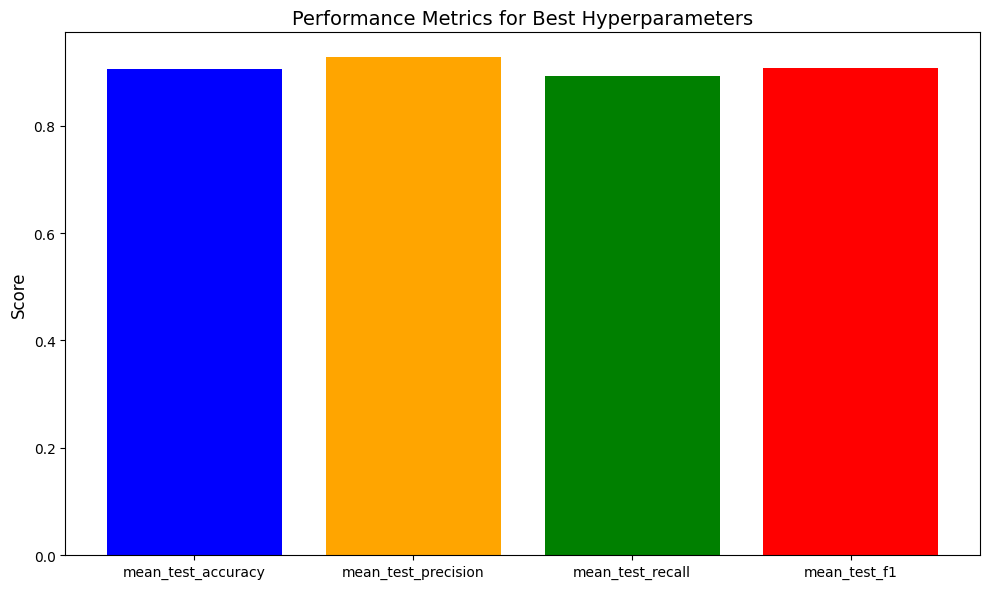

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    make_scorer,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# # Convert dataset to NumPy
# X = ds.to_numpy()
# y = y.to_numpy()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define the pipeline
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),  # Standardize features
        ("svm", SVC(kernel="rbf")),  # SVM with RBF kernel
    ]
)

# Define the hyperparameter grid
param_grid = {
    "svm__C": [0.1, 10, 100],  # C values
    "svm__gamma": [0.01, 0.1, 1],  # Gamma values
}

# Define scoring metrics
scoring = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score, average="macro"),
    "recall": make_scorer(recall_score, average="macro"),
    "f1": make_scorer(f1_score, average="macro"),
}

# Setup StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=4)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    scoring=scoring,
    refit="accuracy",  # Choose the main metric for refitting the best model
    cv=cv,
    return_train_score=True,
)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Extract results into a DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Display the top 5 results sorted by validation accuracy
top_results = results_df.sort_values(by="mean_test_accuracy", ascending=False).head(5)
print("Top 5 Hyperparameter Combinations:")
print(
    top_results[
        ["param_svm__C", "param_svm__gamma", "mean_test_accuracy", "mean_test_f1"]
    ]
)

# Best parameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"\nBest Parameters: {best_params}")
print(f"Best Validation Accuracy: {best_score:.4f}")

# Evaluate on test data
test_score = grid_search.score(X_test, y_test)
print(f"Test Accuracy: {test_score:.4f}")

# Visualization: Multiple Metrics for Best Hyperparameters
metrics = [
    "mean_test_accuracy",
    "mean_test_precision",
    "mean_test_recall",
    "mean_test_f1",
]
best_results = results_df[results_df["param_svm__C"] == best_params["svm__C"]]
best_results = best_results[
    best_results["param_svm__gamma"] == best_params["svm__gamma"]
]

plt.figure(figsize=(10, 6))
plt.bar(
    metrics,
    best_results[metrics].values.flatten(),
    color=["blue", "orange", "green", "red"],
)
plt.title("Performance Metrics for Best Hyperparameters", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.xticks(fontsize=10)
plt.tight_layout()
plt.show()

### Degree Parameter

Fitting 4 folds for each of 27 candidates, totalling 108 fits
Top 5 Hyperparameter Combinations:
    param_svm__C  param_svm__gamma  param_svm__degree  mean_test_accuracy  \
3            0.1              0.01                  3            0.894096   
12          10.0              0.01                  3            0.891471   
0            0.1              0.01                  2            0.882475   
1            0.1              0.10                  2            0.876289   
9           10.0              0.01                  2            0.876289   

    mean_test_f1  
3       0.899079  
12      0.893891  
0       0.889161  
1       0.880146  
9       0.880146  

Best Parameters: {'svm__C': 0.1, 'svm__degree': 3, 'svm__gamma': 0.01}
Best Validation Accuracy: 0.8941
Test Accuracy: 0.8928


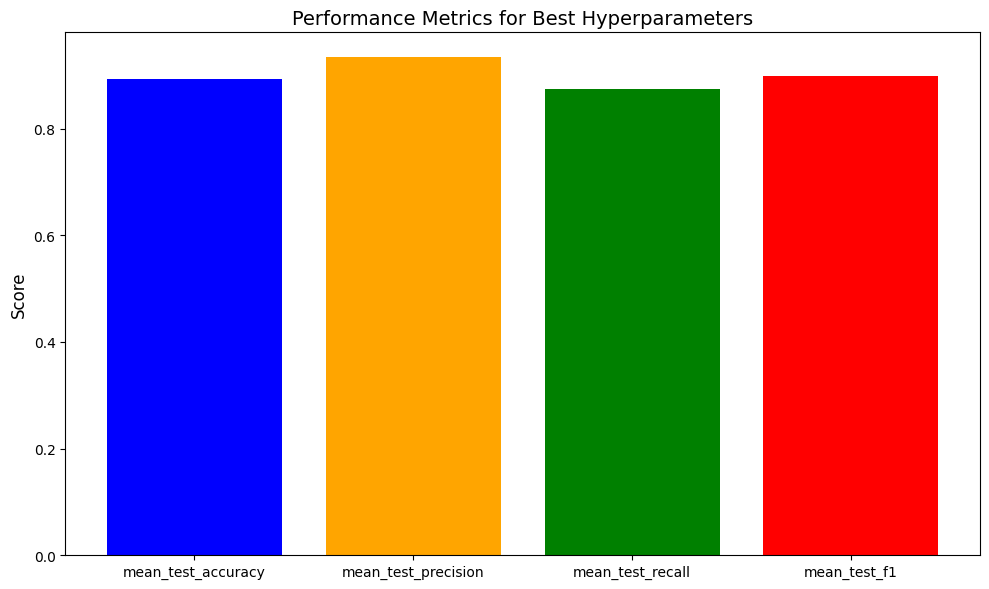

In [7]:
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    make_scorer,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define the pipeline
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),  # Standardize the features
        ("svm", SVC(kernel="poly")),  # SVM with polynomial kernel
    ]
)

# Define the hyperparameter grid
param_grid = {
    "svm__C": [0.1, 10, 100],  # Regularization parameter
    "svm__gamma": [0.01, 0.1, 1],  # Kernel coefficient
    "svm__degree": [2, 3, 4],  # Degree of the polynomial kernel
}

# Define scoring metrics
scoring = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score, average="macro"),
    "recall": make_scorer(recall_score, average="macro"),
    "f1": make_scorer(f1_score, average="macro"),
}

# Set up Stratified K-Fold cross-validation
cv = StratifiedKFold(n_splits=4)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    scoring=scoring,
    refit="accuracy",  # Use accuracy for selecting the best model
    cv=cv,
    return_train_score=True,
    verbose=1,
)

# Fit the model on training data
grid_search.fit(X_train, y_train)

# Extract results into a DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Display top 5 results sorted by validation accuracy
top_results = results_df.sort_values(by="mean_test_accuracy", ascending=False).head(5)
print("Top 5 Hyperparameter Combinations:")
print(
    top_results[
        [
            "param_svm__C",
            "param_svm__gamma",
            "param_svm__degree",
            "mean_test_accuracy",
            "mean_test_f1",
        ]
    ]
)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"\nBest Parameters: {best_params}")
print(f"Best Validation Accuracy: {best_score:.4f}")

# Evaluate the best model on the test set
test_accuracy = grid_search.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Visualization of metrics for the best hyperparameters
metrics = [
    "mean_test_accuracy",
    "mean_test_precision",
    "mean_test_recall",
    "mean_test_f1",
]
best_results = results_df[
    (results_df["param_svm__C"] == best_params["svm__C"])
    & (results_df["param_svm__gamma"] == best_params["svm__gamma"])
    & (results_df["param_svm__degree"] == best_params["svm__degree"])
]

plt.figure(figsize=(10, 6))
plt.bar(
    metrics,
    best_results[metrics].values.flatten(),
    color=["blue", "orange", "green", "red"],
)
plt.title("Performance Metrics for Best Hyperparameters", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.xticks(fontsize=10)
plt.tight_layout()
plt.show()

### Probability Section Graph

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm = SVC(kernel='rbf', probability=True, C=100)
svm.fit(X_train, y_train.ravel())

y_probMLP = svm.predict_proba(X_test)
num_classes = y_probMLP.shape[1]
plt.figure(figsize=(15, 5))
for i in range(num_classes):
    plt.subplot(1, num_classes, i + 1)
    plt.scatter(y_test, y_probMLP[:, i], alpha=0.5)
    plt.title(f'Class {i} Probability')
    plt.xlabel('True Labels')
    plt.ylabel('Predicted Probability')
    plt.ylim(-0.1, 1.1)
plt.tight_layout()
plt.show()

## MLP Classifier

### Base Algorithm with Data Normalization

Fitting 4 folds for each of 72 candidates, totalling 288 fits
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(64,), mlp__learning_rate=constant, scaler=None; total time=   1.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(64,), mlp__learning_rate=constant, scaler=None; total time=   0.5s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(64,), mlp__learning_rate=constant, scaler=None; total time=   0.5s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(64,), mlp__learning_rate=constant, scaler=None; total time=   1.1s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(64,), mlp__learning_rate=constant, scaler=MinMaxScaler(); total time=   0.4s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(64,), mlp__learning_rate=constant, scaler=MinMaxScaler(); total time=   0.3s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_laye

/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(64,), mlp__learning_rate=constant, scaler=StandardScaler(); total time=   2.7s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(64,), mlp__learning_rate=adaptive, scaler=None; total time=   0.7s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(64,), mlp__learning_rate=adaptive, scaler=None; total time=   0.5s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(64,), mlp__learning_rate=adaptive, scaler=None; total time=   0.4s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(64,), mlp__learning_rate=adaptive, scaler=None; total time=   0.6s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(64,), mlp__learning_rate=adaptive, scaler=MinMaxScaler(); total time=   0.5s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(64,), mlp__learning_rate=adaptive, scaler=MinMaxSca

/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(64,), mlp__learning_rate=adaptive, scaler=StandardScaler(); total time=   2.6s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(128,), mlp__learning_rate=constant, scaler=None; total time=   1.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(128,), mlp__learning_rate=constant, scaler=None; total time=   0.5s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(128,), mlp__learning_rate=constant, scaler=None; total time=   0.5s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(128,), mlp__learning_rate=constant, scaler=None; total time=   0.9s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(128,), mlp__learning_rate=constant, scaler=MinMaxScaler(); total time=   0.5s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(128,), mlp__learning_rate=constant, scaler=Min

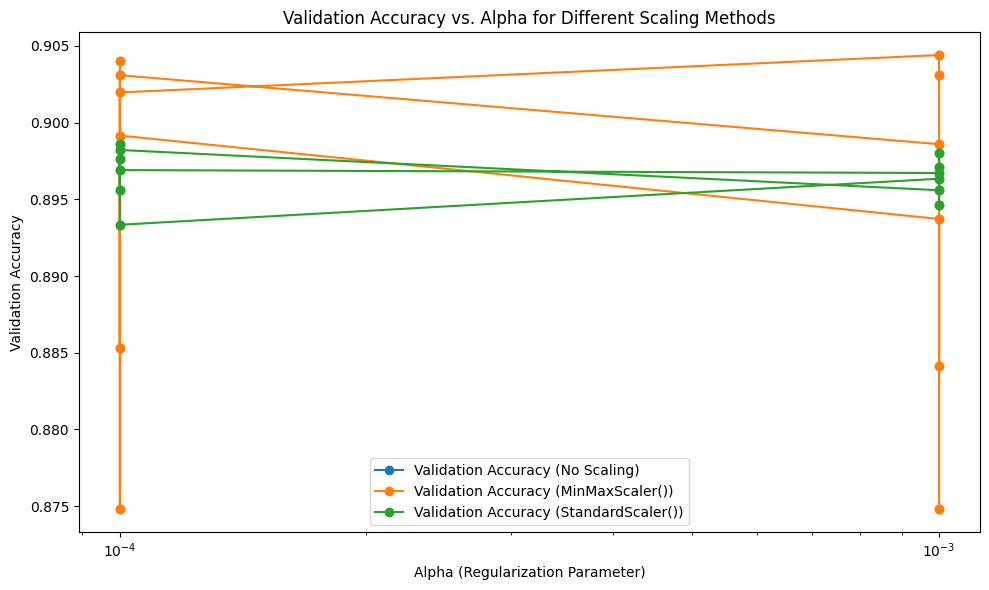

In [8]:
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    make_scorer,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define scaling methods
scalers = {"No Scaling": None, "MinMax": MinMaxScaler(), "Standard": StandardScaler()}

# Define the MLP pipeline
pipeline = Pipeline(
    [
        ("scaler", None),  # Placeholder for scaler
        ("mlp", MLPClassifier(max_iter=500, random_state=42)),
    ]
)

# Define hyperparameter grid
param_grid = {
    "scaler": [None, MinMaxScaler(), StandardScaler()],  # Scaling methods
    "mlp__hidden_layer_sizes": [(64,), (128,), (64, 64)],  # Hidden layer configurations
    "mlp__activation": ["relu", "tanh"],  # Activation functions
    "mlp__alpha": [0.0001, 0.001],  # Regularization parameter
    "mlp__learning_rate": ["constant", "adaptive"],  # Learning rate schedules
}

# Define scoring metrics
scoring = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score, average="macro"),
    "recall": make_scorer(recall_score, average="macro"),
    "f1": make_scorer(f1_score, average="macro"),
}

# Stratified K-Fold cross-validation
cv = StratifiedKFold(n_splits=4)

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    scoring=scoring,
    refit="accuracy",  # Use accuracy to select the best model
    cv=cv,
    verbose=2,
    return_train_score=True,
)

# Fit the model
grid_search.fit(X_train, y_train)

# Extract results into a DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Display the top 5 hyperparameter combinations sorted by validation accuracy
top_results = results_df.sort_values(by="mean_test_accuracy", ascending=False).head(5)
print("Top 5 Hyperparameter Combinations:")
print(
    top_results[
        [
            "param_scaler",
            "param_mlp__hidden_layer_sizes",
            "param_mlp__activation",
            "param_mlp__alpha",
            "param_mlp__learning_rate",
            "mean_test_accuracy",
        ]
    ]
)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"\nBest Parameters: {best_params}")
print(f"Best Validation Accuracy: {best_score:.4f}")

# Test the best model on the test set
test_accuracy = grid_search.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot validation accuracy for each scaling method
scaling_methods = ["No Scaling", "MinMaxScaler()", "StandardScaler()"]
plt.figure(figsize=(10, 6))
for scale_method in scaling_methods:
    subset = results_df[results_df["param_scaler"].astype(str) == scale_method]
    plt.plot(
        subset["param_mlp__alpha"],
        subset["mean_test_accuracy"],
        label=f"Validation Accuracy ({scale_method})",
        marker="o",
    )

# Configure plot
plt.xscale("log")  # Log scale for alpha
plt.xlabel("Alpha (Regularization Parameter)")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy vs. Alpha for Different Scaling Methods")
plt.legend()
plt.tight_layout()
plt.show()

### Hidden Layer Sizes

Fitting 4 folds for each of 36 candidates, totalling 144 fits
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(64,); total time=   0.5s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(64,); total time=   0.3s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(64,); total time=   0.3s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(64,); total time=   0.2s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(128,); total time=   0.4s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(128,); total time=   0.2s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(128,); total time=   0.3s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(128,); total time=   0.4s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(256,); total time=   0.7s
[CV] END mlp__activation=relu, ml

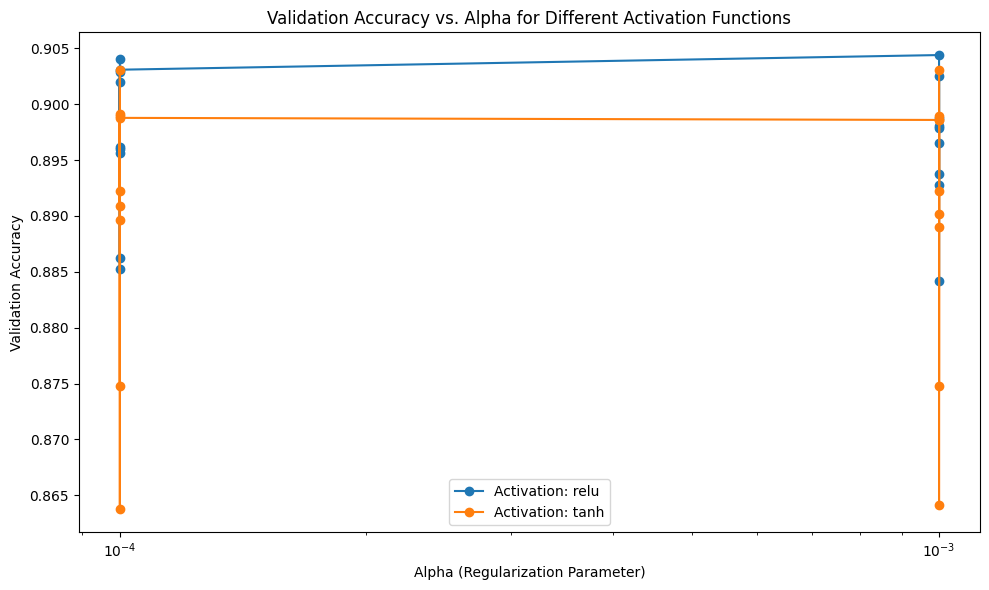

In [9]:
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    make_scorer,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
)
import pandas as pd
import matplotlib.pyplot as plt

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define pipeline
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),  # Scaling using MinMaxScaler
        ("mlp", MLPClassifier(max_iter=300, random_state=42)),  # MLP Classifier
    ]
)

# Define hyperparameter grid for hidden layer sizes
layer_configs = [(1,), (2,), (3,)]  # Number of layers
node_counts = [64, 128, 256]  # Nodes per layer
hidden_layer_combinations = [
    tuple([nodes] * layers[0]) for layers in layer_configs for nodes in node_counts
]

param_grid = {
    "mlp__hidden_layer_sizes": hidden_layer_combinations,  # Configurations of hidden layers
    "mlp__activation": ["relu", "tanh"],  # Activation functions
    "mlp__alpha": [0.0001, 0.001],  # Regularization strengths
}

# Define scoring metrics
scoring = {
    "accuracy": make_scorer(accuracy_score),
    "f1": make_scorer(f1_score, average="macro"),
    "precision": make_scorer(precision_score, average="macro"),
    "recall": make_scorer(recall_score, average="macro"),
}

# GridSearchCV
cv = StratifiedKFold(n_splits=4)

grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    scoring=scoring,
    refit="accuracy",  # Use accuracy as the primary metric for model selection
    cv=cv,
    verbose=2,
    return_train_score=True,
)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Extract results into a DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Display the top 5 configurations based on validation accuracy
top_results = results_df.sort_values(by="mean_test_accuracy", ascending=False).head(5)
print("\nTop 5 Configurations by Validation Accuracy:")
print(
    top_results[
        [
            "param_mlp__hidden_layer_sizes",
            "param_mlp__activation",
            "param_mlp__alpha",
            "mean_test_accuracy",
        ]
    ]
)

# Best configuration
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"\nBest Parameters: {best_params}")
print(f"Best Validation Accuracy: {best_score:.4f}")

# Evaluate the best model on the test set
test_accuracy = grid_search.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Visualize results
plt.figure(figsize=(10, 6))

# Plot validation accuracy for different configurations
for activation in ["relu", "tanh"]:
    subset = results_df[results_df["param_mlp__activation"] == activation]
    plt.plot(
        subset["param_mlp__alpha"],
        subset["mean_test_accuracy"],
        label=f"Activation: {activation}",
        marker="o",
    )

# Configure plot
plt.xscale("log")  # Log scale for alpha
plt.xlabel("Alpha (Regularization Parameter)")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy vs. Alpha for Different Activation Functions")
plt.legend()
plt.tight_layout()
plt.show()

### Varying Parameters

Fitting 4 folds for each of 24 candidates, totalling 96 fits


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END mlp__alpha=0.1, mlp__hidden_layer_sizes=[10, 10], mlp__solver=lbfgs; total time=   0.4s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END mlp__alpha=0.1, mlp__hidden_layer_sizes=[10, 10], mlp__solver=lbfgs; total time=   0.4s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END mlp__alpha=0.1, mlp__hidden_layer_sizes=[10, 10], mlp__solver=lbfgs; total time=   0.4s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END mlp__alpha=0.1, mlp__hidden_layer_sizes=[10, 10], mlp__solver=lbfgs; total time=   0.4s
[CV] END mlp__alpha=0.1, mlp__hidden_layer_sizes=[10, 10], mlp__solver=adam; total time=   0.4s
[CV] END mlp__alpha=0.1, mlp__hidden_layer_sizes=[10, 10], mlp__solver=adam; total time=   0.3s
[CV] END mlp__alpha=0.1, mlp__hidden_layer_sizes=[10, 10], mlp__solver=adam; total time=   0.5s
[CV] END mlp__alpha=0.1, mlp__hidden_layer_sizes=[10, 10], mlp__solver=adam; total time=   0.4s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END mlp__alpha=0.1, mlp__hidden_layer_sizes=[10], mlp__solver=lbfgs; total time=   0.3s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END mlp__alpha=0.1, mlp__hidden_layer_sizes=[10], mlp__solver=lbfgs; total time=   0.3s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END mlp__alpha=0.1, mlp__hidden_layer_sizes=[10], mlp__solver=lbfgs; total time=   0.3s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END mlp__alpha=0.1, mlp__hidden_layer_sizes=[10], mlp__solver=lbfgs; total time=   0.3s
[CV] END mlp__alpha=0.1, mlp__hidden_layer_sizes=[10], mlp__solver=adam; total time=   0.5s
[CV] END mlp__alpha=0.1, mlp__hidden_layer_sizes=[10], mlp__solver=adam; total time=   0.5s
[CV] END mlp__alpha=0.1, mlp__hidden_layer_sizes=[10], mlp__solver=adam; total time=   0.3s
[CV] END mlp__alpha=0.1, mlp__hidden_layer_sizes=[10], mlp__solver=adam; total time=   0.5s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END mlp__alpha=0.1, mlp__hidden_layer_sizes=[10, 10, 10], mlp__solver=lbfgs; total time=   0.5s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END mlp__alpha=0.1, mlp__hidden_layer_sizes=[10, 10, 10], mlp__solver=lbfgs; total time=   0.5s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END mlp__alpha=0.1, mlp__hidden_layer_sizes=[10, 10, 10], mlp__solver=lbfgs; total time=   0.5s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END mlp__alpha=0.1, mlp__hidden_layer_sizes=[10, 10, 10], mlp__solver=lbfgs; total time=   0.5s
[CV] END mlp__alpha=0.1, mlp__hidden_layer_sizes=[10, 10, 10], mlp__solver=adam; total time=   0.9s
[CV] END mlp__alpha=0.1, mlp__hidden_layer_sizes=[10, 10, 10], mlp__solver=adam; total time=   0.6s
[CV] END mlp__alpha=0.1, mlp__hidden_layer_sizes=[10, 10, 10], mlp__solver=adam; total time=   0.4s
[CV] END mlp__alpha=0.1, mlp__hidden_layer_sizes=[10, 10, 10], mlp__solver=adam; total time=   0.6s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END mlp__alpha=1, mlp__hidden_layer_sizes=[10, 10], mlp__solver=lbfgs; total time=   0.4s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END mlp__alpha=1, mlp__hidden_layer_sizes=[10, 10], mlp__solver=lbfgs; total time=   0.4s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END mlp__alpha=1, mlp__hidden_layer_sizes=[10, 10], mlp__solver=lbfgs; total time=   0.4s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END mlp__alpha=1, mlp__hidden_layer_sizes=[10, 10], mlp__solver=lbfgs; total time=   0.4s
[CV] END mlp__alpha=1, mlp__hidden_layer_sizes=[10, 10], mlp__solver=adam; total time=   0.3s
[CV] END mlp__alpha=1, mlp__hidden_layer_sizes=[10, 10], mlp__solver=adam; total time=   0.3s
[CV] END mlp__alpha=1, mlp__hidden_layer_sizes=[10, 10], mlp__solver=adam; total time=   0.3s
[CV] END mlp__alpha=1, mlp__hidden_layer_sizes=[10, 10], mlp__solver=adam; total time=   0.4s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END mlp__alpha=1, mlp__hidden_layer_sizes=[10], mlp__solver=lbfgs; total time=   0.3s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END mlp__alpha=1, mlp__hidden_layer_sizes=[10], mlp__solver=lbfgs; total time=   0.3s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END mlp__alpha=1, mlp__hidden_layer_sizes=[10], mlp__solver=lbfgs; total time=   0.3s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END mlp__alpha=1, mlp__hidden_layer_sizes=[10], mlp__solver=lbfgs; total time=   0.3s
[CV] END mlp__alpha=1, mlp__hidden_layer_sizes=[10], mlp__solver=adam; total time=   0.4s
[CV] END mlp__alpha=1, mlp__hidden_layer_sizes=[10], mlp__solver=adam; total time=   0.4s
[CV] END mlp__alpha=1, mlp__hidden_layer_sizes=[10], mlp__solver=adam; total time=   0.3s
[CV] END mlp__alpha=1, mlp__hidden_layer_sizes=[10], mlp__solver=adam; total time=   0.4s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END mlp__alpha=1, mlp__hidden_layer_sizes=[10, 10, 10], mlp__solver=lbfgs; total time=   0.5s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END mlp__alpha=1, mlp__hidden_layer_sizes=[10, 10, 10], mlp__solver=lbfgs; total time=   0.5s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END mlp__alpha=1, mlp__hidden_layer_sizes=[10, 10, 10], mlp__solver=lbfgs; total time=   0.5s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END mlp__alpha=1, mlp__hidden_layer_sizes=[10, 10, 10], mlp__solver=lbfgs; total time=   0.5s
[CV] END mlp__alpha=1, mlp__hidden_layer_sizes=[10, 10, 10], mlp__solver=adam; total time=   0.8s
[CV] END mlp__alpha=1, mlp__hidden_layer_sizes=[10, 10, 10], mlp__solver=adam; total time=   0.5s
[CV] END mlp__alpha=1, mlp__hidden_layer_sizes=[10, 10, 10], mlp__solver=adam; total time=   0.6s
[CV] END mlp__alpha=1, mlp__hidden_layer_sizes=[10, 10, 10], mlp__solver=adam; total time=   0.4s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END mlp__alpha=10, mlp__hidden_layer_sizes=[10, 10], mlp__solver=lbfgs; total time=   0.4s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END mlp__alpha=10, mlp__hidden_layer_sizes=[10, 10], mlp__solver=lbfgs; total time=   0.4s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END mlp__alpha=10, mlp__hidden_layer_sizes=[10, 10], mlp__solver=lbfgs; total time=   0.4s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END mlp__alpha=10, mlp__hidden_layer_sizes=[10, 10], mlp__solver=lbfgs; total time=   0.4s
[CV] END mlp__alpha=10, mlp__hidden_layer_sizes=[10, 10], mlp__solver=adam; total time=   0.2s
[CV] END mlp__alpha=10, mlp__hidden_layer_sizes=[10, 10], mlp__solver=adam; total time=   0.2s
[CV] END mlp__alpha=10, mlp__hidden_layer_sizes=[10, 10], mlp__solver=adam; total time=   0.2s
[CV] END mlp__alpha=10, mlp__hidden_layer_sizes=[10, 10], mlp__solver=adam; total time=   0.7s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END mlp__alpha=10, mlp__hidden_layer_sizes=[10], mlp__solver=lbfgs; total time=   0.3s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END mlp__alpha=10, mlp__hidden_layer_sizes=[10], mlp__solver=lbfgs; total time=   0.3s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END mlp__alpha=10, mlp__hidden_layer_sizes=[10], mlp__solver=lbfgs; total time=   0.3s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END mlp__alpha=10, mlp__hidden_layer_sizes=[10], mlp__solver=lbfgs; total time=   0.3s
[CV] END mlp__alpha=10, mlp__hidden_layer_sizes=[10], mlp__solver=adam; total time=   0.3s
[CV] END mlp__alpha=10, mlp__hidden_layer_sizes=[10], mlp__solver=adam; total time=   0.5s
[CV] END mlp__alpha=10, mlp__hidden_layer_sizes=[10], mlp__solver=adam; total time=   0.2s
[CV] END mlp__alpha=10, mlp__hidden_layer_sizes=[10], mlp__solver=adam; total time=   0.4s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END mlp__alpha=10, mlp__hidden_layer_sizes=[10, 10, 10], mlp__solver=lbfgs; total time=   0.5s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END mlp__alpha=10, mlp__hidden_layer_sizes=[10, 10, 10], mlp__solver=lbfgs; total time=   0.5s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END mlp__alpha=10, mlp__hidden_layer_sizes=[10, 10, 10], mlp__solver=lbfgs; total time=   0.5s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END mlp__alpha=10, mlp__hidden_layer_sizes=[10, 10, 10], mlp__solver=lbfgs; total time=   0.5s
[CV] END mlp__alpha=10, mlp__hidden_layer_sizes=[10, 10, 10], mlp__solver=adam; total time=   0.3s
[CV] END mlp__alpha=10, mlp__hidden_layer_sizes=[10, 10, 10], mlp__solver=adam; total time=   0.3s
[CV] END mlp__alpha=10, mlp__hidden_layer_sizes=[10, 10, 10], mlp__solver=adam; total time=   0.3s
[CV] END mlp__alpha=10, mlp__hidden_layer_sizes=[10, 10, 10], mlp__solver=adam; total time=   0.9s
[CV] END mlp__alpha=100, mlp__hidden_layer_sizes=[10, 10], mlp__solver=lbfgs; total time=   0.4s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END mlp__alpha=100, mlp__hidden_layer_sizes=[10, 10], mlp__solver=lbfgs; total time=   0.4s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END mlp__alpha=100, mlp__hidden_layer_sizes=[10, 10], mlp__solver=lbfgs; total time=   0.4s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END mlp__alpha=100, mlp__hidden_layer_sizes=[10, 10], mlp__solver=lbfgs; total time=   0.4s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END mlp__alpha=100, mlp__hidden_layer_sizes=[10, 10], mlp__solver=adam; total time=   0.7s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END mlp__alpha=100, mlp__hidden_layer_sizes=[10, 10], mlp__solver=adam; total time=   0.7s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END mlp__alpha=100, mlp__hidden_layer_sizes=[10, 10], mlp__solver=adam; total time=   0.7s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END mlp__alpha=100, mlp__hidden_layer_sizes=[10, 10], mlp__solver=adam; total time=   0.7s
[CV] END mlp__alpha=100, mlp__hidden_layer_sizes=[10], mlp__solver=lbfgs; total time=   0.3s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END mlp__alpha=100, mlp__hidden_layer_sizes=[10], mlp__solver=lbfgs; total time=   0.3s
[CV] END mlp__alpha=100, mlp__hidden_layer_sizes=[10], mlp__solver=lbfgs; total time=   0.3s
[CV] END mlp__alpha=100, mlp__hidden_layer_sizes=[10], mlp__solver=lbfgs; total time=   0.3s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END mlp__alpha=100, mlp__hidden_layer_sizes=[10], mlp__solver=adam; total time=   0.3s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END mlp__alpha=100, mlp__hidden_layer_sizes=[10], mlp__solver=adam; total time=   0.3s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END mlp__alpha=100, mlp__hidden_layer_sizes=[10], mlp__solver=adam; total time=   0.3s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END mlp__alpha=100, mlp__hidden_layer_sizes=[10], mlp__solver=adam; total time=   0.3s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END mlp__alpha=100, mlp__hidden_layer_sizes=[10, 10, 10], mlp__solver=lbfgs; total time=   0.5s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END mlp__alpha=100, mlp__hidden_layer_sizes=[10, 10, 10], mlp__solver=lbfgs; total time=   0.5s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END mlp__alpha=100, mlp__hidden_layer_sizes=[10, 10, 10], mlp__solver=lbfgs; total time=   0.5s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END mlp__alpha=100, mlp__hidden_layer_sizes=[10, 10, 10], mlp__solver=lbfgs; total time=   0.5s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END mlp__alpha=100, mlp__hidden_layer_sizes=[10, 10, 10], mlp__solver=adam; total time=   0.9s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END mlp__alpha=100, mlp__hidden_layer_sizes=[10, 10, 10], mlp__solver=adam; total time=   0.9s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END mlp__alpha=100, mlp__hidden_layer_sizes=[10, 10, 10], mlp__solver=adam; total time=   0.9s


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END mlp__alpha=100, mlp__hidden_layer_sizes=[10, 10, 10], mlp__solver=adam; total time=   0.8s

Top 5 Configurations by Validation Accuracy:
   param_mlp__solver  param_mlp__alpha param_mlp__hidden_layer_sizes  \
3               adam               0.1                          [10]   
5               adam               0.1                  [10, 10, 10]   
20             lbfgs             100.0                          [10]   
1               adam               0.1                      [10, 10]   
18             lbfgs             100.0                      [10, 10]   

    mean_test_accuracy  
3             0.907780  
5             0.906280  
20            0.904780  
1             0.904406  
18            0.903843  

Best Parameters: {'mlp__alpha': 0.1, 'mlp__hidden_layer_sizes': [10], 'mlp__solver': 'adam'}
Best Validation Accuracy: 0.9078
Test Accuracy: 0.8861


/Users/anujpatel/Coding/Python/CSE 546/MachineLearningFinalProject-1/finalproject/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


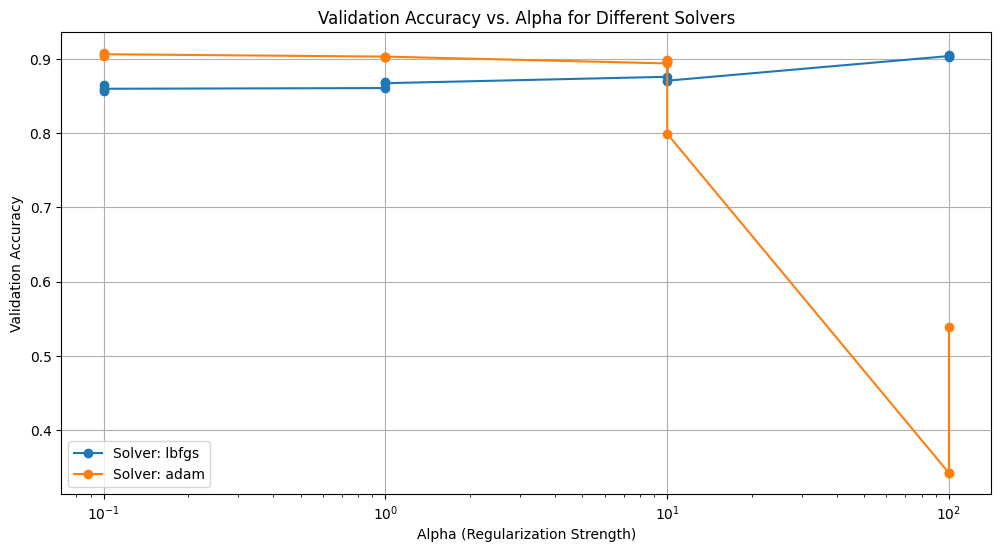

In [10]:
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    make_scorer,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define the pipeline
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),  # Scaling features
        ("mlp", MLPClassifier(random_state=0, max_iter=300)),  # MLP Classifier
    ]
)

# Define hyperparameter grid
param_grid = {
    "mlp__solver": ["lbfgs", "adam"],  # Solvers
    "mlp__alpha": [0.1, 1, 10, 100],  # Regularization strengths
    "mlp__hidden_layer_sizes": [
        [10, 10],
        [10],
        [10, 10, 10],
    ],  # Hidden layer configurations
}

# Define scoring metrics
scoring = {
    "accuracy": make_scorer(accuracy_score),
    "f1": make_scorer(f1_score, average="macro"),
    "precision": make_scorer(precision_score, average="macro"),
    "recall": make_scorer(recall_score, average="macro"),
}

# Set up StratifiedKFold for consistent splits
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=50)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=scoring,
    refit="accuracy",  # Use accuracy as the main metric for selecting the best model
    cv=cv,
    verbose=2,
    return_train_score=True,
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Extract results into a DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Display top configurations based on validation accuracy
top_results = results_df.sort_values(by="mean_test_accuracy", ascending=False).head(5)
print("\nTop 5 Configurations by Validation Accuracy:")
print(
    top_results[
        [
            "param_mlp__solver",
            "param_mlp__alpha",
            "param_mlp__hidden_layer_sizes",
            "mean_test_accuracy",
        ]
    ]
)

# Best parameters and validation accuracy
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"\nBest Parameters: {best_params}")
print(f"Best Validation Accuracy: {best_score:.4f}")

# Test set evaluation
test_accuracy = grid_search.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Visualization of train and validation scores for regularization strength (alpha)
plt.figure(figsize=(12, 6))

# Filter results for specific solver to plot
for solver in ["lbfgs", "adam"]:
    subset = results_df[results_df["param_mlp__solver"] == solver]
    plt.plot(
        subset["param_mlp__alpha"],
        subset["mean_test_accuracy"],
        label=f"Solver: {solver}",
        marker="o",
    )

# Configure plot
plt.xscale("log")
plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy vs. Alpha for Different Solvers")
plt.legend()
plt.grid(True)
plt.show()

### MLP Predicting Probability

In [ ]:
# MLP predicting pobability ----------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
mlp = MLPClassifier(solver='lbfgs', random_state=0, alpha=100, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train.ravel())

y_probMLP = mlp.predict_proba(X_test)
num_classes = y_probMLP.shape[1]
plt.figure(figsize=(15, 5))
for i in range(num_classes):
    plt.subplot(1, num_classes, i + 1)
    plt.scatter(y_test, y_probMLP[:, i], alpha=0.5)
    plt.title(f'Class {i} Probability')
    plt.xlabel('True Labels')
    plt.ylabel('Predicted Probability')
    plt.ylim(-0.1, 1.1)

plt.tight_layout()
plt.show()

## SVM and MLP

In [ ]:
# SVC and MLP together:  --------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
Xtrain = scaler.fit_transform(X_train)
Xtest = scaler.transform(X_test)

mlp = MLPClassifier(solver='lbfgs', random_state=0, alpha=100, hidden_layer_sizes=[10])
mlp.fit(Xtrain, y_train.ravel())

svm = SVC(kernel='rbf', probability=True, C=100)
svm.fit(Xtrain, y_train.ravel())

proba1 = mlp.predict_proba(Xtest)[:, 1]
proba2 = svm.predict_proba(Xtest)[:, 1]

label_encoder = LabelEncoder()
y_test_numeric = label_encoder.fit_transform(y_test)

plt.scatter(proba1, proba2, c=y_test_numeric, cmap='viridis')
plt.xlabel("Model 1 Probability")
plt.ylabel("Model 2 Probability")
plt.title("Scatter Plot of Predicted Probabilities")
plt.colorbar()
plt.show()

svm_probs = svm.predict_proba(Xtest)
mlp_probs = mlp.predict_proba(Xtest)

# Scatter plots for each class
class_labels = {0: 'person', 1: 'sign', 2: 'bike', 3: 'bus', 4: 'car'}
n_classes = len(class_labels)
fig, axes = plt.subplots(1, n_classes, figsize=(15, 4))
for i, ax in enumerate(axes):
    ax.scatter(svm_probs[:, i], mlp_probs[:, i], alpha=0.5)
    ax.set_title(f'Class {class_labels[i]}')
    ax.set_xlabel('SVM Probability')
    ax.set_ylabel('MLP Probability')

plt.suptitle('SVM vs. MLP Probability Scatter Plots per Class')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Ensemble Methods: Bagging and AdaBoost


### Bagging

### AdaBoost

## Clustering